# Chapter 10 - Introduction to Artificial Neural Networks

In [1]:
### SETUP

# Numpy
import numpy as np

# Scikit learn datasets
from sklearn.datasets import load_iris

# Scikit learn Perceptron
from sklearn.linear_model import Perceptron

# For plotting
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
%matplotlib inline

### Load data

# Iris dataset:
iris = load_iris()

X.shape = (150, 2)
y.shape = (150,)


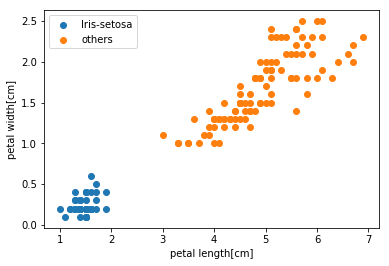

In [2]:
### Fetch dataset
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==0,0], X[y==0,1])
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(['Iris-setosa', 'others'])

print('X.shape = {}'.format(X.shape))
print('y.shape = {}'.format(y.shape))

In [3]:
### Run a perceptron classifier on this data

per_clf = Perceptron(max_iter=1000, random_state=42, tol=1e-03)

per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

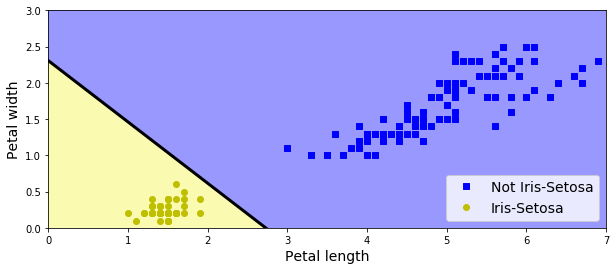

In [6]:
### From :
# 0 = w0 + x1w1 + x2w2 | 1/w2
# 0 = w0/w2 + x1 w1/w2 + x2
# x2 = -w0/w2 - x1 w1/w2
#  y =   b    +  x  a
# Calculate b and a for the line equation
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_  / per_clf.coef_[0][1]

# Set axes limits
axes = [0, 7, 0, 3]

# Create meshgrid for the axes
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Create test data to predict for based on the meshgrid above
X_new = np.c_[x0.ravel(), x1.ravel()]
# Predict class for every pair of features 
y_predict = per_clf.predict(X_new)
# Reshape predictions as matrix so it is the same shape as x0 or x1
zz = y_predict.reshape(x0.shape)


### Plot
plt.figure(figsize=(10, 4))
# Plot the not-setosa
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
# Plot the setosa
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# Plot boundary
plt.plot([axes[0], axes[1]], \
         [a * axes[0] + b, a * axes[1] + b], \
          "k-", linewidth=3)

# Plot coloured contour
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)


plt.show()